<a href="https://colab.research.google.com/github/mitsurukikkawa/Python/blob/master/190914_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

df1 = pd.read_csv('train.csv', header=0)
df2 = pd.read_csv('test.csv', header=0)
df1.head()

,price,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137
0,8.000349,1,1,0,0,16.206865,9,9,9,9,9,8,8,8,8,7,7,7,7,7,7,7,8,8,7,7,7,8,7,7,9,10,10,10,9,9,9,9,9,9,...,5,8,6,9,3,8,10,9,9,8,9,8,8,10,6,9,8,7,7,8,9,8,8,7,5,10,10,3,4,4,5,4,2,7,10,3,10,7,5,8
1,6.573680,1,1,1,0,19.559892,10,10,10,10,10,10,10,10,10,10,9,9,9,10,9,9,9,9,9,9,10,9,9,9,10,4,5,5,5,5,4,4,4,4,...,4,5,7,8,6,6,5,4,4,4,4,4,4,9,7,9,10,7,6,6,8,7,7,7,6,9,8,6,5,5,4,3,3,9,9,3,10,9,9,10
2,8.217439,1,1,1,0,17.779308,10,10,10,10,10,10,10,10,10,9,9,10,10,10,9,9,10,9,9,8,10,9,9,9,10,10,10,10,10,7,8,8,8,9,...,4,10,10,10,9,11,11,8,8,8,8,11,11,9,6,9,10,6,5,6,6,7,7,3,6,9,9,4,4,4,4,3,2,10,10,3,10,11,11,11
3,6.802395,1,20,0,0,15.941239,7,7,8,8,8,4,5,5,5,5,4,4,5,5,5,4,4,4,5,5,6,6,4,4,8,4,4,5,6,5,6,6,6,6,...,7,8,8,9,7,6,4,5,5,5,5,5,6,10,7,5,7,4,6,6,4,6,6,7,4,10,10,3,3,3,3,3,2,10,10,3,10,8,10,8
4,7.216709,1,1,0,0,16.281288,7,7,7,7,7,6,6,6,7,7,6,6,6,6,7,6,6,6,7,7,6,6,6,6,11,7,7,6,8,8,6,6,6,7,...,7,6,7,9,6,7,5,7,7,7,7,7,7,9,7,6,7,5,5,5,4,11,11,5,5,8,9,4,4,5,5,5,4,4,8,5,11,4,4,5


In [5]:
df2.head()

,price,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,...,x98,x99,x100,x101,x102,x103,x104,x105,x106,x107,x108,x109,x110,x111,x112,x113,x114,x115,x116,x117,x118,x119,x120,x121,x122,x123,x124,x125,x126,x127,x128,x129,x130,x131,x132,x133,x134,x135,x136,x137
0,7.903966,1,1,0,0,16.206865,9,9,9,9,9,8,8,7,8,8,8,8,7,8,7,8,8,7,8,7,2,8,7,7,9,10,10,9,10,9,9,9,9,9,...,6,2,8,5,8,3,8,9,9,9,8,9,8,10,6,9,8,5,6,6,6,9,9,5,5,10,10,3,4,4,5,4,2,7,10,3,10,7,5,10
1,6.492240,1,1,1,0,19.559892,10,10,10,10,10,10,10,9,10,10,9,10,9,9,10,9,9,9,9,9,9,9,9,9,10,5,5,5,5,5,4,4,4,4,...,4,5,5,6,7,6,6,4,4,4,4,4,4,9,7,7,4,7,6,6,6,6,6,5,6,9,8,6,5,5,4,3,2,9,9,3,9,9,8,10
2,8.103192,1,1,1,0,17.779308,10,10,10,10,10,10,10,9,10,10,10,10,9,10,10,9,9,9,9,10,9,9,9,9,10,10,10,10,10,10,8,8,8,8,...,4,9,10,9,10,9,11,8,8,8,8,8,11,9,6,8,5,5,5,5,7,7,7,7,6,9,9,4,4,4,5,3,2,9,10,3,10,11,11,11
3,6.693324,1,20,0,0,15.941239,8,8,8,8,8,5,5,5,5,5,4,4,4,5,5,4,4,4,4,6,6,6,4,4,9,4,4,4,5,7,6,6,6,6,...,9,7,8,7,8,7,6,5,5,5,5,5,5,10,5,5,10,6,4,4,5,10,10,10,3,10,10,3,3,3,3,3,2,10,10,2,10,8,9,9
4,7.208600,1,1,0,0,16.281288,7,7,7,7,7,6,6,6,6,7,6,6,6,6,7,6,6,6,6,7,6,6,6,6,11,7,7,6,7,8,6,6,6,7,...,8,6,7,7,6,6,5,7,7,7,7,7,7,9,7,7,7,6,5,5,4,11,11,5,5,8,9,4,5,5,5,5,4,4,8,5,11,4,4,6


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

train_x = df1.drop(['price'], axis=1)
train_y = df1['price']

test_x = df2.drop(['price'], axis=1)
test_y = df2['price']

In [7]:
random_forest = RandomForestRegressor(max_depth=30, n_estimators=30, random_state=42)
random_forest.fit(train_x, train_y)

train_y_pred = random_forest.predict(train_x)
test_y_pred = random_forest.predict(test_x)

#np.savetxt("190914-predict.csv", test_y_pred, delimiter=",")

print('MAPE train : %.3f, test : %.3f' % (np.mean(np.abs((train_y-train_y_pred)/train_y))*100, np.mean(np.abs((test_y-test_y_pred)/test_y))*100) )
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(train_y, train_y_pred), mean_squared_error(test_y,test_y_pred)) )
from sklearn.metrics import r2_score
print('R2 train : %.3f, test : %.3f' % (r2_score(train_y, train_y_pred), r2_score(test_y, test_y_pred)) )


MAPE train : 2.312, test : 4.492
MSE train : 0.050, test : 0.163
R2 train : 0.947, test : 0.825


In [8]:
fti = pd.DataFrame({ 'feature_name' :train_x.columns, 'importance' :random_forest.feature_importances_})
sfti=fti.sort_values("importance", ascending=False).reset_index(drop=True).loc[:10, :]
fti.sort_values("importance", ascending=False).reset_index(drop=True).loc[:10, :]

,feature_name,importance
0,x31,0.381226
1,x5,0.108989
2,x37,0.052590
3,x2,0.045186
4,x96,0.038061
5,x105,0.023999
6,x124,0.018082
7,x32,0.014893
8,x1,0.014872
9,x36,0.013133


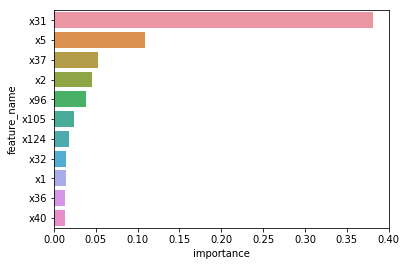

In [9]:
import seaborn as sns
sns.barplot(sfti['importance'],sfti['feature_name'])

In [10]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

from sklearn.metrics import accuracy_score

gbm = lgb.LGBMRegressor(objective='regression',
                        num_leaves = 31,
                        n_estimators=100)
gbm.fit(train_x, train_y,
        eval_set=[(test_x, test_y)],
        eval_metric='l2',
        verbose=0)

train_y_pred = gbm.predict(train_x)
test_y_pred = gbm.predict(test_x)

print('MAPE train : %.3f, test : %.3f' % (np.mean(np.abs((train_y-train_y_pred)/train_y))*100, np.mean(np.abs((test_y-test_y_pred)/test_y))*100) )

from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(train_y, train_y_pred), mean_squared_error(test_y,test_y_pred)) )

from sklearn.metrics import r2_score
print('R2 train : %.3f, test : %.3f' % (r2_score(train_y, train_y_pred), r2_score(test_y, test_y_pred)) )


MAPE train : 3.294, test : 4.771
MSE train : 0.111, test : 0.185
R2 train : 0.881, test : 0.801


In [11]:
fti = pd.DataFrame({ 'feature_name' :train_x.columns, 'importance' :gbm.feature_importances_})
sfti=fti.sort_values("importance", ascending=False).reset_index(drop=True).loc[:10, :]
fti.sort_values("importance", ascending=False).reset_index(drop=True).loc[:10, :]

,feature_name,importance
0,x5,340
1,x2,204
2,x1,104
3,x124,77
4,x31,71
5,x105,57
6,x98,44
7,x44,43
8,x57,41
9,x123,38


In [12]:
import xgboost as xgb
xgb = xgb.XGBRegressor(max_depth=3)
xgb.fit(train_x, train_y)
train_y_pred = xgb.predict(train_x)
test_y_pred = xgb.predict(test_x)

print('MAPE train : %.3f, test : %.3f' % (np.mean(np.abs((train_y-train_y_pred)/train_y))*100, np.mean(np.abs((test_y-test_y_pred)/test_y))*100) )

from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(train_y, train_y_pred), mean_squared_error(test_y,test_y_pred)) )

from sklearn.metrics import r2_score
print('R2 train : %.3f, test : %.3f' % (r2_score(train_y, train_y_pred), r2_score(test_y, test_y_pred)) )


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[04:44:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAPE train : 5.014, test : 5.615
MSE train : 0.216, test : 0.249
R2 train : 0.767, test : 0.731


In [13]:
fti = pd.DataFrame({ 'feature_name' :train_x.columns, 'importance' :xgb.feature_importances_})
sfti=fti.sort_values("importance", ascending=False).reset_index(drop=True).loc[:10, :]
fti.sort_values("importance", ascending=False).reset_index(drop=True).loc[:10, :]


,feature_name,importance
0,x37,0.202888
1,x31,0.153031
2,x96,0.048586
3,x38,0.028391
4,x107,0.020131
5,x6,0.018213
6,x40,0.017370
7,x105,0.017248
8,x16,0.017191
9,x99,0.017106
